In [1]:
import tensorflow as tf
# your code here
with tf.device('/device:CPU:0'):
    from deepface import DeepFace
    model = DeepFace.build_model('Facenet')

2022-12-25 03:14:47.300077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 03:14:47.420218: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-25 03:14:48.113646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/usr/local/cuda/efa/lib:/usr/local/cuda

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-12-25 03:14:07.902029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 03:14:08.027665: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-25 03:14:08.729680: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/usr/local/cuda/efa/lib:/usr/local/cuda

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1231142785047405607
xla_global_id: -1
]


2022-12-25 03:14:09.569641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 03:14:09.620542: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-25 03:14:09.620583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ip-172-31-26-126.ec2.internal
2022-12-25 03:14:09.620590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ip-172-31-26-126.ec2.internal
2022-12-25 03:14:09.620672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.60.13
2022-

In [ ]:
from deepface.commons import functions, realtime, distance as dst
embedding = model.predict(img)[0].tolist()

In [2]:
with tf.device('/device:CPU:0'):
    x = DeepFace.represent(img_path="img_align_celeba/000006.jpg", model=model)
print(type(x))
print(len(x))


1/1 [==============================] - 2s 2s/step
<class 'numpy.ndarray'>
128


In [3]:
import torch
import timm
m = timm.create_model('resnet50', pretrained=True, num_classes=0).cpu()
o = m(torch.randn(2, 3, 224, 224))
print(f'Pooled shape: {o.shape}')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Pooled shape: torch.Size([2, 2048])


In [2]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  16,384
│    │    └─BatchNorm2d: 3-2             512
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  18,432
│    │    └─BatchNorm2d: 3-5             512
│    │    └─Identity: 3-6                --
│    │    └─ReLU: 3-7                    --
│    │    └─Identity: 3-8                --
│    │    └─Conv2d: 3-9                  65,536
│    │    └─BatchNorm2d: 3-10            512
│    │    └─ReLU: 3-11                   --
│    │    └─Sequential: 3-12             16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-13                 65,536


In [5]:
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face verification
# result = DeepFace.verify(img1_path = "face.jpeg", 
#           img2_path = "face.jpeg", 
#           distance_metric = metrics[1]
# )

In [13]:
print(result)

{'verified': True, 'distance': 0.0, 'threshold': 0.6, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean'}


In [4]:
colordiff_config = dict(
    device = "gpu",
    pin_memory = True,
    T=350,
    # lr=6e-4,
    lr = 0.00006,
    batch_size=4,
    img_size = 128,
    sample=True,
    should_log=True,
    epochs=2000,
    using_cond=True,
    display_every=20,
    dynamic_threshold=False,
    train_autoenc=False,
    enc_loss_coeff = 1.5,
) 

from dataset import make_dataloaders_celeba
train_dl, val_dl = make_dataloaders_celeba("./img_align_celeba", colordiff_config, num_workers=4, limit=100)

train size: 182339
val size: 20260


In [3]:
import torch
def L_to_rgb(L):
    return torch.cat([L, L, L], dim=1)

In [29]:
x = next(iter(train_dl))
print(x.shape)

torch.Size([4, 3, 128, 128])


In [30]:
im = x[:1,]

In [31]:
# im = im[:, :1, :, :]
print(im.shape)

torch.Size([1, 3, 128, 128])


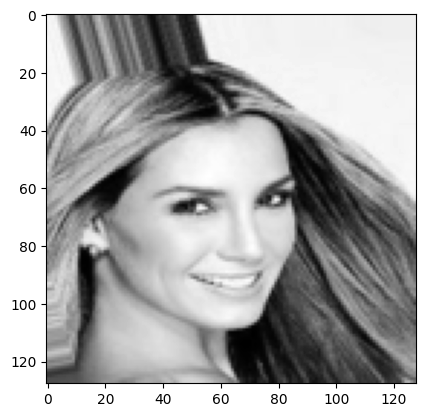

In [9]:
import matplotlib.pyplot as plt
plt.imshow(im.numpy().squeeze(), cmap="gray")


In [11]:
import numpy as np


def custom_to_pil(x, process=True):
  x = x.detach().cpu()
  if process:
    x = torch.clamp(x, -1., 1.)
    x = (x + 1.)/2.
  x = x.permute(1,2,0).numpy()
  if process:
    x = (255*x).astype(np.uint8)
#   x = Image.fromarray(x)
#   if not x.mode == "RGB":
    # x = x.convert("RGB")
  return x

In [12]:
rgb = L_to_rgb(im)
rgb = rgb.squeeze()
pil = custom_to_pil(rgb)

In [17]:
x.shape

torch.Size([4, 3, 128, 128])

In [28]:
for tensor in x:
    pil = custom_to_pil(L_to_rgb(tensor[:1]))
    print(pil.shape)
    detection = DeepFace.represent(img_path=pil, model=model)
    # print(len(detection))
    print(tensor[:1].shape)
# print(type(detection))
# print(len(detection))

# v = DeepFace.verify(img1_path=pil, img2_path="./000001.jpg", model=model)
# print(v)

(384, 128, 1)
torch.Size([1, 128, 128])
(384, 128, 1)
torch.Size([1, 128, 128])
(384, 128, 1)
torch.Size([1, 128, 128])
(384, 128, 1)
torch.Size([1, 128, 128])
